In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta,date
%matplotlib inline

In [2]:
#turnstile_190525
data_table = pd.read_csv("turnstile_190525.txt", parse_dates=[[6,7]])
data_table

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS
0,2019-05-18 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7062481,2393489
1,2019-05-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7062505,2393492
2,2019-05-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7062529,2393526
3,2019-05-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7062627,2393612
4,2019-05-18 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,RECOVR AUD,7062835,2393662
5,2019-05-18 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7063097,2393696
6,2019-05-19 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7063280,2393719
7,2019-05-19 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7063308,2393725
8,2019-05-19 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7063316,2393744
9,2019-05-19 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,7063393,2393793


### To ensure that there are no null values

In [3]:
data_table.isnull().any()

DATE_TIME                                                               False
C/A                                                                     False
UNIT                                                                    False
SCP                                                                     False
STATION                                                                 False
LINENAME                                                                False
DIVISION                                                                False
DESC                                                                    False
ENTRIES                                                                 False
EXITS                                                                   False
dtype: bool

### To ensure that there are no Door Close or Door Open in the description

### To get the Clean number of exits and entries 

In [4]:
def getRealVisitorsNumber(list1):
    newlist=[]
    base = list1[0]
    for i in range(0 , len(list1)):
        result = list1[i]-base
        if result < 0 :
            newlist.append(list1[i])
        else:
            newlist.append(result)
        base = list1[i]
    return newlist    
  

### Cleaning entries 

In [5]:
data_table['ENTRIES']=getRealVisitorsNumber(data_table.ENTRIES.tolist())
data_table

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS
0,2019-05-18 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,0,2393489
1,2019-05-18 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,24,2393492
2,2019-05-18 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,24,2393526
3,2019-05-18 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,98,2393612
4,2019-05-18 16:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,RECOVR AUD,208,2393662
5,2019-05-18 20:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,262,2393696
6,2019-05-19 00:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,183,2393719
7,2019-05-19 04:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,28,2393725
8,2019-05-19 08:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,8,2393744
9,2019-05-19 12:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,REGULAR,77,2393793


### Cleaning exits 

In [6]:
data_table.columns=data_table.columns.str.strip()
print(data_table.columns)
data_table.EXITS

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')


0         2393489
1         2393492
2         2393526
3         2393612
4         2393662
           ...   
203358        378
203359        378
203360        378
203361        378
203362        378
Name: EXITS, Length: 203363, dtype: int64

In [7]:
data_table['EXITS']=getRealVisitorsNumber(data_table.EXITS.tolist())

### Group by station

In [8]:
data_table.groupby('STATION').EXITS.sum()
# gb.first()

STATION
1 AV                1395759392
103 ST               585495451
103 ST-CORONA         56438028
104 ST             93912985358
110 ST                18805547
                      ...     
WOODLAWN              11790359
WORLD TRADE CTR     1840105485
WTC-CORTLANDT          1981867
YORK ST               29785185
ZEREGA AV               550503
Name: EXITS, Length: 378, dtype: int64

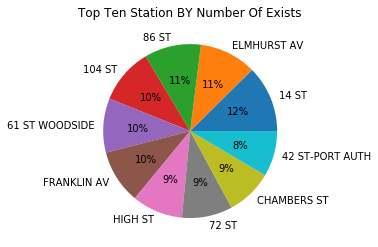

In [50]:
# plt.figure(figsize=(200,200))
exists_sum = data_table.groupby('STATION').sum().sort_values('EXITS',ascending=False)
plt.pie(exists_sum.head(10).EXITS,labels= exists_sum.head(10).index.values,autopct='%1.0f%%');
# plt.bar(exists_sum.head(10).STATION,exists_sum.head(10).EXITS)#.bar();
plt.title("Top Ten Station BY Number Of Exists");